<a href="https://colab.research.google.com/github/EdgarGM20/ML-NLP/blob/main/S5TC1_Analisis_Sentimientos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Análisis de sentimientos y técnicas de NLP

En este taller podrán poner en práctica sus conocimientos sobre las diferentes técnicas para el procesamiento de lenguaje natural. El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción sentimientos de viajeros en Twitter

En este taller se usará el conjunto de datos de sentimientos sobre distintas aerolíneas de EE.UU. provenientes de Twitter. Cada observación contiene si el sentimiento de los tweets es positivo, neutral o negativo teniendo en cuenta distintas variables como aerolínea y las razones de los sentimientos negativos (como "retraso en el vuelo" o "servicio grosero"). El objetivo es predecir el sentimiento asociado a cada tweet. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/crowdflower/twitter-airline-sentiment).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# Lectura de la información de archivo .zip
tweets = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Tweets.zip', index_col=0)

# Visualización dataset
tweets.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,
570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
# Impresión tamaño del cojunto de datos
tweets.shape

(14640, 14)

### Análisis descriptivo

In [5]:
# Cuenta de tweets por cada sentimiento
tweets['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [6]:
# Cuenta de tweets por cada aerolínea
tweets['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

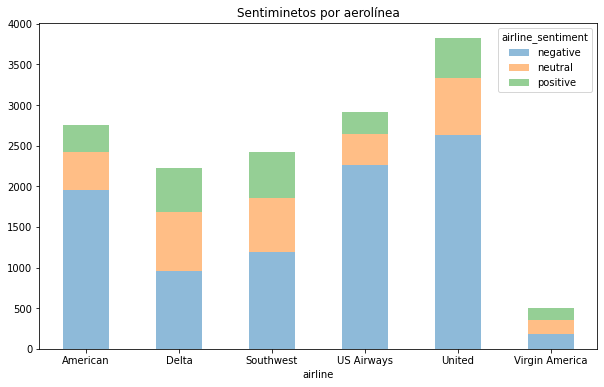

In [7]:
# Plot con cuenta de tweets por cada aerolínea y sentimiento
pd.crosstab(index = tweets["airline"],columns = tweets["airline_sentiment"]).plot(kind='bar',figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Sentiminetos por aerolínea")

### Liberias y Variables de interés y predicción

In [8]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

In [9]:
# Separación de variables predictoras (X) y de variable de interés (y)
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

In [10]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Punto 1 - Uso de CountVectorizer

En la celda 1 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [11]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
vect = CountVectorizer(lowercase=False) # stop_words='english', max_features=10000
X_dtm = vect.fit_transform(X_train)

X_res, y_res = sm.fit_resample(X_dtm, y_train)
#print('Resampled dataset shape %s' % Counter(y_res))

In [12]:
def tokenize_RF_model(X_train, y_train, X_test, y_test, vect):
  from imblearn.ensemble import BalancedRandomForestClassifier
  from imblearn.over_sampling import SMOTE

  X_dtm = vect.fit_transform(X_train)
  X_dtm_test = vect.transform(X_test)
  print('Features: ', X_dtm.shape[1])

  sm = SMOTE(random_state=42)
  X_res, y_res = sm.fit_resample(X_dtm, y_train)

  # Definición del modelo con los parámetros 
  #clf = RandomForestClassifier(class_weight='balanced_subsample', random_state=42) # balanced_subsample
  clf = BalancedRandomForestClassifier(random_state=42)
  clf.fit(X_dtm, y_train)
  #clf.fit(X_res, y_res)

  # Generacion de predicciones
  y_pred = clf.predict(X_dtm_test)

  # Validación cruzada
  cv_RF = pd.Series(cross_val_score(clf, X_dtm_test, y_test, cv=10)).describe()

  # Accuracy total
  acc_t = accuracy_score(y_test, y_pred)

  # Accuracy per class
  cm = confusion_matrix(y_test, y_pred)
  m = len(y_test.value_counts())
  acc_cl = [acc_t, cv_RF['mean']]
  for i in range(m):
    acc_cl.append(cm[i][i]/y_test.value_counts().iloc[i])

  print("\nMatriz de confusion: \n", cm)
  print("\nAccuracy score: \n", acc_t)
  print("\nValidación cruzada: \n", cv_RF)
  print("\nAccuracy per class: \n", acc_cl[2:5])
  return acc_cl

In [13]:
from pandas.core.common import random_state
# Celda 1
vect = CountVectorizer(lowercase=False) # stop_words='english', max_features=10000
RF_1 = tokenize_RF_model(X_train, y_train, X_test, y_test, vect)

Features:  14356

Matriz de confusion: 
 [[2133  696  256]
 [ 142  728  114]
 [  77  170  516]]

Accuracy score: 
 0.6988824503311258

Validación cruzada: 
 count    10.000000
mean      0.664525
std       0.019204
min       0.643892
25%       0.651163
50%       0.660455
75%       0.678054
max       0.695652
dtype: float64

Accuracy per class: 
 [0.6914100486223663, 0.7398373983739838, 0.6762778505897772]


**Conclusión**
- El modelo con CountVectorizer obtiene un **accuracy general** de 0.699. Sin embargo, al revisar por clases se observa que tiene buen desempeño clasificando la clase **neutra** (0.739), las otras dos clases, negativa y positiva tiene un accuracy de 0.691 y 0.676 respectivamente.

### Punto 2 - Eliminación de Stopwords

En la celda 2 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **eliminen stopwords** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [14]:
# Celda 2
vect_sw = CountVectorizer(stop_words='english', lowercase=False) # stop_words='english', max_features=10000
RF_2 = tokenize_RF_model(X_train, y_train, X_test, y_test, vect_sw)

Features:  14082

Matriz de confusion: 
 [[1827  927  331]
 [  99  733  152]
 [  48  170  545]]

Accuracy score: 
 0.6425910596026491

Validación cruzada: 
 count    10.000000
mean      0.608235
std       0.018457
min       0.583851
25%       0.594413
50%       0.601449
75%       0.627329
max       0.632231
dtype: float64

Accuracy per class: 
 [0.5922204213938411, 0.7449186991869918, 0.7142857142857143]


**Conclusión**
- El modelo con CountVectorizer y eliminando las StopWords obtiene un **accuracy general** de 0.642. Sin embargo, al revisar por clases se observa que tiene buen desempeño clasificando las clases **neutra y positiva** (0.744 y 0.714 respectivamente), mientra que la clase **negativa** tiene un accuracy de 0.592.

### Punto 3 - Lematización con verbos

En la celda 3 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [15]:
# Celda 3
# Importación de librerias
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

import nltk
nltk.download('wordnet')

# Definición de la función que tenga como parámetro texto y devuelva una lista de lemas
def split_into_lemmas(text):
  text = text.lower()
  words = text.split()
  return [wordnet_lemmatizer.lemmatize(word, pos='v') for word in words]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [16]:
vect_lemas = CountVectorizer(analyzer=split_into_lemmas)
RF_3 = tokenize_RF_model(X_train, y_train, X_test, y_test, vect_lemas)

Features:  19380

Matriz de confusion: 
 [[2202  679  204]
 [ 154  735   95]
 [  74  165  524]]

Accuracy score: 
 0.7162665562913907

Validación cruzada: 
 count    10.000000
mean      0.676534
std       0.018275
min       0.650104
25%       0.659078
50%       0.683563
75%       0.689441
max       0.699793
dtype: float64

Accuracy per class: 
 [0.7137763371150729, 0.7469512195121951, 0.6867627785058977]


**Conclusión**
- El modelo con CountVectorizer y lemmatizando s obtiene un **accuracy general** de 0.716. Y en comparación con los dos modelos anteriores es el que tiene mejor desempeño clasificando por clases **negativa, neutra y positiva** (0.713, 0.746 y 0.686 respectivamente).

### Punto 4 - Multiples técnicas

En la celda 4 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer, eliminen stopwords, lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [17]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
def split_into_lemmas_sw(text):
  text = text.lower()
  words = text.split()
  return [wordnet_lemmatizer.lemmatize(word, pos='v') for word in words if word not in stopwords.words('english')]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
# Celda 4
vect_lemas_sw = CountVectorizer(analyzer=split_into_lemmas_sw)
RF_4 = tokenize_RF_model(X_train, y_train, X_test, y_test, vect_lemas_sw)

Features:  19247

Matriz de confusion: 
 [[1954  945  186]
 [ 139  737  108]
 [  64  169  530]]

Accuracy score: 
 0.6665976821192053

Validación cruzada: 
 count    10.000000
mean      0.612161
std       0.018307
min       0.587992
25%       0.598861
50%       0.610766
75%       0.623772
max       0.638430
dtype: float64

Accuracy per class: 
 [0.633387358184765, 0.7489837398373984, 0.6946264744429882]


**Conclusión**
- El modelo con CountVectorizer, lemmatizando y eliminando las StopWords obtiene un **accuracy general** de 0.666. Sin embargo, al revisar por clases se observa que tiene buen desempeño clasificando las clases **neutra y positiva** (0.748 y 0.694 respectivamente), mientras que la clase **negativa** tiene un accuracy de 0.633.

### Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos (random forest) y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

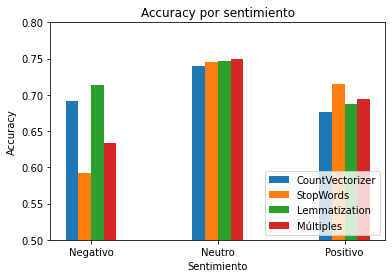

In [19]:
# Celda 5
import numpy as np
import matplotlib.pyplot as plt
 
serie_1 = RF_1[2:5]
serie_2 = RF_2[2:5]
serie_3 = RF_3[2:5]
serie_4 = RF_4[2:5]
 
numero_de_grupos = len(serie_1)
indice_barras = np.arange(numero_de_grupos)
ancho_barras =0.1
 
plt.bar(indice_barras, serie_1, width=ancho_barras, label='CountVectorizer')
plt.bar(indice_barras + ancho_barras, serie_2, width=ancho_barras, label='StopWords')
plt.bar(indice_barras + 2*ancho_barras, serie_3, width=ancho_barras, label='Lemmatization')
plt.bar(indice_barras + 3*ancho_barras, serie_4, width=ancho_barras, label='Múltiples')
plt.legend(loc='lower right')
## Se colocan los indicadores en el eje x
plt.xticks(indice_barras + 1.5*ancho_barras, ('Negativo', 'Neutro', 'Positivo'))
 
plt.ylabel('Accuracy')
plt.xlabel('Sentimiento')
plt.title('Accuracy por sentimiento')
plt.ylim(0.5, 0.8)
 
plt.show()

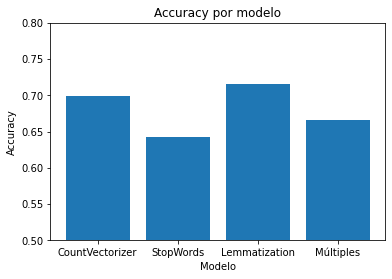

In [20]:
serie_y = [RF_1[0], RF_2[0], RF_3[0], RF_4[0]]
serie_x = ['CountVectorizer', 'StopWords', 'Lemmatization', 'Múltiples']
plt.bar(serie_x, serie_y)
plt.ylabel('Accuracy')
plt.xlabel('Modelo')
plt.title('Accuracy por modelo')
plt.ylim(0.5, 0.8)
plt.show()

**Conclusiones**
- Al estar desbalanceados los datos, se tuvo que emplear una técnica para submuestrear la clase con más muestra para que no influyera en los resultados de las otras clases.
- Al comparar los 4 modelos, el modelo con mejor accuracy fue en el que se hizo la **lemmatización** (0.71) y el que obtuvo más bajo desempeño fue en el que solo se eliminaron los **stopwords** (0.64).
- Por otro lado, se observa que el modelo con lemmatización obtiene el mejor accuracy para la clase **negativa**. En cuanto a la clase **neutra**, los 4 modelos obtienen resultados similares y en la clase **positiva**, el mejor algoritmo es el que elimina las stopwords.
- La principal ventaja que tiene el modelo con **lemmatización** es que permite encontrar el lema de las palabras a partir de su contexto dentro de la oración, por lo que le permite al algoritmo identificar de mejor manera el sentido de esta y por ende, logra un mejor desempeño.
- La principal desventaja del modelo que elimina las **stopwords** es que puede que algunas de estas aporten información relevante para determinar el sentimiento de este, por lo que su desempeño fue menor.